In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

# 시카고의 안전을 위해

최근 10년간의 데이터를 분석, 보완할 부분을 파악한다.

In [6]:
query_string = """
SELECT unique_key,
        date,
        primary_type,
        location_description,
        arrest,
        domestic,
        beat,
        community_area
FROM `bigquery-public-data.chicago_crime.crime`
where year between 2012 and 2021
order by date ;
"""

df = client.query(query_string).to_dataframe()
df.head()

,unique_key,date,primary_type,location_description,arrest,domestic,beat,community_area
0,8429131,2012-01-01 01:00:00+00:00,DECEPTIVE PRACTICE,ATM (AUTOMATIC TELLER MACHINE),False,False,1834,8.0
1,8452622,2012-01-01 01:00:00+00:00,THEFT,TAVERN/LIQUOR STORE,False,False,1832,8.0
2,8608264,2012-01-01 01:00:00+00:00,THEFT,MEDICAL/DENTAL OFFICE,False,False,1423,24.0
3,9142576,2012-01-01 01:00:00+00:00,THEFT,"SCHOOL, PUBLIC, BUILDING",False,False,1523,25.0
4,8421988,2012-01-01 01:00:00+00:00,BATTERY,PARK PROPERTY,True,True,1123,27.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2670253 entries, 0 to 2670252
Data columns (total 8 columns):
 #   Column                Dtype              
---  ------                -----              
 0   unique_key            int64              
 1   date                  datetime64[ns, UTC]
 2   primary_type          object             
 3   location_description  object             
 4   arrest                bool               
 5   domestic              bool               
 6   beat                  int64              
 7   community_area        float64            
dtypes: bool(2), datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 127.3+ MB


In [44]:
# 결측치 제거
df.isna().sum()

unique_key                 0
date                       0
primary_type               0
location_description    8442
arrest                     0
domestic                   0
beat                       0
community_area            32
dtype: int64

In [179]:
df = df.dropna()
df

,unique_key,date,primary_type,location_description,arrest,domestic,beat,community_area
0,8429131,2012-01-01 01:00:00+00:00,DECEPTIVE PRACTICE,ATM (AUTOMATIC TELLER MACHINE),False,False,1834,8.0
1,8452622,2012-01-01 01:00:00+00:00,THEFT,TAVERN/LIQUOR STORE,False,False,1832,8.0
2,8608264,2012-01-01 01:00:00+00:00,THEFT,MEDICAL/DENTAL OFFICE,False,False,1423,24.0
3,9142576,2012-01-01 01:00:00+00:00,THEFT,"SCHOOL, PUBLIC, BUILDING",False,False,1523,25.0
4,8421988,2012-01-01 01:00:00+00:00,BATTERY,PARK PROPERTY,True,True,1123,27.0
...,...,...,...,...,...,...,...,...
2670248,12581388,2021-12-31 12:45:00+00:00,ASSAULT,APARTMENT,False,False,221,39.0
2670249,12581450,2021-12-31 12:45:00+00:00,CONCEALED CARRY LICENSE VIOLATION,STREET,True,False,614,71.0
2670250,12581977,2021-12-31 12:46:00+00:00,ASSAULT,COMMERCIAL / BUSINESS OFFICE,False,False,623,44.0
2670251,12582396,2021-12-31 12:49:00+00:00,DECEPTIVE PRACTICE,RESIDENCE,False,False,611,71.0


In [180]:
# 가정 관련 범죄는 제외
df1 = df.loc[df['domestic'] == False]
df1

,unique_key,date,primary_type,location_description,arrest,domestic,beat,community_area
0,8429131,2012-01-01 01:00:00+00:00,DECEPTIVE PRACTICE,ATM (AUTOMATIC TELLER MACHINE),False,False,1834,8.0
1,8452622,2012-01-01 01:00:00+00:00,THEFT,TAVERN/LIQUOR STORE,False,False,1832,8.0
2,8608264,2012-01-01 01:00:00+00:00,THEFT,MEDICAL/DENTAL OFFICE,False,False,1423,24.0
3,9142576,2012-01-01 01:00:00+00:00,THEFT,"SCHOOL, PUBLIC, BUILDING",False,False,1523,25.0
5,9049473,2012-01-01 01:00:00+00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False,332,43.0
...,...,...,...,...,...,...,...,...
2670248,12581388,2021-12-31 12:45:00+00:00,ASSAULT,APARTMENT,False,False,221,39.0
2670249,12581450,2021-12-31 12:45:00+00:00,CONCEALED CARRY LICENSE VIOLATION,STREET,True,False,614,71.0
2670250,12581977,2021-12-31 12:46:00+00:00,ASSAULT,COMMERCIAL / BUSINESS OFFICE,False,False,623,44.0
2670251,12582396,2021-12-31 12:49:00+00:00,DECEPTIVE PRACTICE,RESIDENCE,False,False,611,71.0


In [181]:
# 년, 월 별도 설정
df1['month'] = df1['date'].dt.strftime('%Y-%m')
df1['year'] = df1['date'].dt.strftime('%Y')
df1

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_35602/2014687281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = df1['date'].dt.strftime('%Y-%m')
/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_35602/2014687281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = df1['date'].dt.strftime('%Y')


,unique_key,date,primary_type,location_description,arrest,domestic,beat,community_area,month,year
0,8429131,2012-01-01 01:00:00+00:00,DECEPTIVE PRACTICE,ATM (AUTOMATIC TELLER MACHINE),False,False,1834,8.0,2012-01,2012
1,8452622,2012-01-01 01:00:00+00:00,THEFT,TAVERN/LIQUOR STORE,False,False,1832,8.0,2012-01,2012
2,8608264,2012-01-01 01:00:00+00:00,THEFT,MEDICAL/DENTAL OFFICE,False,False,1423,24.0,2012-01,2012
3,9142576,2012-01-01 01:00:00+00:00,THEFT,"SCHOOL, PUBLIC, BUILDING",False,False,1523,25.0,2012-01,2012
5,9049473,2012-01-01 01:00:00+00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False,332,43.0,2012-01,2012
...,...,...,...,...,...,...,...,...,...,...
2670248,12581388,2021-12-31 12:45:00+00:00,ASSAULT,APARTMENT,False,False,221,39.0,2021-12,2021
2670249,12581450,2021-12-31 12:45:00+00:00,CONCEALED CARRY LICENSE VIOLATION,STREET,True,False,614,71.0,2021-12,2021
2670250,12581977,2021-12-31 12:46:00+00:00,ASSAULT,COMMERCIAL / BUSINESS OFFICE,False,False,623,44.0,2021-12,2021
2670251,12582396,2021-12-31 12:49:00+00:00,DECEPTIVE PRACTICE,RESIDENCE,False,False,611,71.0,2021-12,2021


In [182]:
# 년도별 분석
df1_year = df1['year'].value_counts().reset_index().sort_values('index')
df1_year

,index,year
0,2012,287084
1,2013,262175
2,2014,234695
6,2015,222138
3,2016,225203
4,2017,224797
5,2018,223487
7,2019,216498
8,2020,170493
9,2021,160948


In [183]:
df1_year.columns = ['year', 'count']
df1_year

,year,count
0,2012,287084
1,2013,262175
2,2014,234695
6,2015,222138
3,2016,225203
4,2017,224797
5,2018,223487
7,2019,216498
8,2020,170493
9,2021,160948


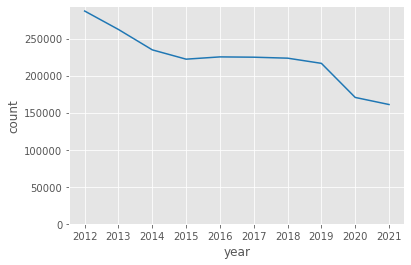

In [385]:
sns.lineplot(data = df1_year, x = 'year', y = 'count', color = 'tab:blue')
plt.ylim(bottom = 0)
plt.show()

In [185]:
(171745 - 217709) / 217709 *100

-21.11258606672209

- 2019~20: 약 -21%

In [186]:
# 년+월별 분석
df1_month = df1['month'].value_counts().reset_index().sort_values('index')
df1_month

,index,month
15,2012-01,22478
35,2012-02,20366
7,2012-03,24209
10,2012-04,23158
3,2012-05,25500
...,...,...
106,2021-08,14198
98,2021-09,15133
96,2021-10,15394
107,2021-11,13792


In [187]:
df1_month.columns = ['month', 'count']
df1_month

,month,count
15,2012-01,22478
35,2012-02,20366
7,2012-03,24209
10,2012-04,23158
3,2012-05,25500
...,...,...
106,2021-08,14198
98,2021-09,15133
96,2021-10,15394
107,2021-11,13792


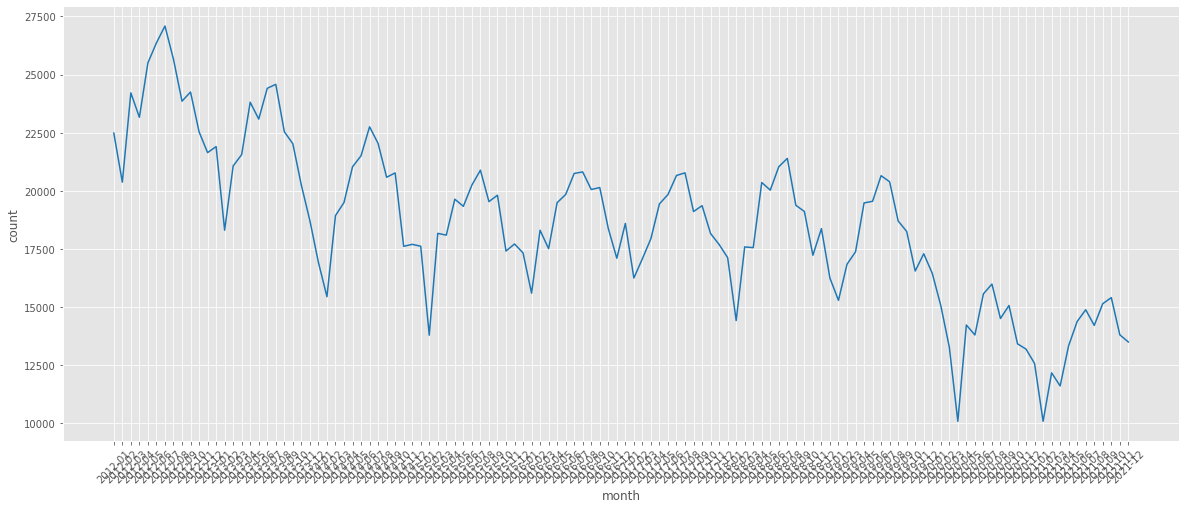

In [188]:
plt.figure(figsize = (20,8))
sns.lineplot(data = df1_month, x = 'month', y = 'count', color = 'tab:blue')
plt.xticks(rotation = 45)
plt.show()

특정 월에 범죄가 급감하고 다시 올라간다

In [189]:
df1['only_month'] = df1['date'].dt.strftime('%m')
df1

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_35602/875801696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['only_month'] = df1['date'].dt.strftime('%m')


,unique_key,date,primary_type,location_description,arrest,domestic,beat,community_area,month,year,only_month
0,8429131,2012-01-01 01:00:00+00:00,DECEPTIVE PRACTICE,ATM (AUTOMATIC TELLER MACHINE),False,False,1834,8.0,2012-01,2012,01
1,8452622,2012-01-01 01:00:00+00:00,THEFT,TAVERN/LIQUOR STORE,False,False,1832,8.0,2012-01,2012,01
2,8608264,2012-01-01 01:00:00+00:00,THEFT,MEDICAL/DENTAL OFFICE,False,False,1423,24.0,2012-01,2012,01
3,9142576,2012-01-01 01:00:00+00:00,THEFT,"SCHOOL, PUBLIC, BUILDING",False,False,1523,25.0,2012-01,2012,01
5,9049473,2012-01-01 01:00:00+00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False,332,43.0,2012-01,2012,01
...,...,...,...,...,...,...,...,...,...,...,...
2670248,12581388,2021-12-31 12:45:00+00:00,ASSAULT,APARTMENT,False,False,221,39.0,2021-12,2021,12
2670249,12581450,2021-12-31 12:45:00+00:00,CONCEALED CARRY LICENSE VIOLATION,STREET,True,False,614,71.0,2021-12,2021,12
2670250,12581977,2021-12-31 12:46:00+00:00,ASSAULT,COMMERCIAL / BUSINESS OFFICE,False,False,623,44.0,2021-12,2021,12
2670251,12582396,2021-12-31 12:49:00+00:00,DECEPTIVE PRACTICE,RESIDENCE,False,False,611,71.0,2021-12,2021,12


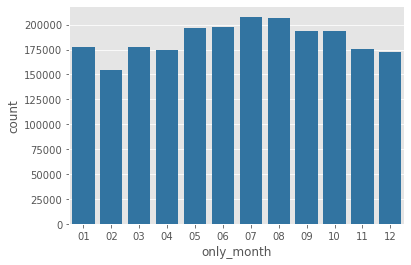

In [190]:
sns.countplot(data = df1, x = 'only_month', color = 'tab:blue')
plt.show()

- 2월이 상대적으로 범죄 발생 수가 적음
- 여름(7,8월) 상대적으로 범죄 발생 수가 많음

# 가장 많이 일어난 범죄 (primary_type)

In [191]:
df1['primary_type'].value_counts()

THEFT                                578859
CRIMINAL DAMAGE                      254106
BATTERY                              247581
NARCOTICS                            188126
DECEPTIVE PRACTICE                   162246
ASSAULT                              139972
BURGLARY                             130957
OTHER OFFENSE                        111030
MOTOR VEHICLE THEFT                  109828
ROBBERY                              100238
CRIMINAL TRESPASS                     61556
WEAPONS VIOLATION                     50771
PUBLIC PEACE VIOLATION                18699
INTERFERENCE WITH PUBLIC OFFICER      11003
PROSTITUTION                          10104
OFFENSE INVOLVING CHILDREN             9971
SEX OFFENSE                            9116
CRIM SEXUAL ASSAULT                    9032
HOMICIDE                               5666
ARSON                                  4269
CRIMINAL SEXUAL ASSAULT                3234
LIQUOR LAW VIOLATION                   2967
GAMBLING                        

In [192]:
# 같은 항목, 다른 표기 통합
df1['primary_type'] = df1['primary_type'].replace('NON - CRIMINAL', 'NON-CRIMINAL')
df1['primary_type'] = df1['primary_type'].replace('NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON-CRIMINAL')
df1

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_35602/935409946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['primary_type'] = df1['primary_type'].replace('NON - CRIMINAL', 'NON-CRIMINAL')
/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_35602/935409946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['primary_type'] = df1['primary_type'].replace('NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON-CRIMINAL')


,unique_key,date,primary_type,location_description,arrest,domestic,beat,community_area,month,year,only_month
0,8429131,2012-01-01 01:00:00+00:00,DECEPTIVE PRACTICE,ATM (AUTOMATIC TELLER MACHINE),False,False,1834,8.0,2012-01,2012,01
1,8452622,2012-01-01 01:00:00+00:00,THEFT,TAVERN/LIQUOR STORE,False,False,1832,8.0,2012-01,2012,01
2,8608264,2012-01-01 01:00:00+00:00,THEFT,MEDICAL/DENTAL OFFICE,False,False,1423,24.0,2012-01,2012,01
3,9142576,2012-01-01 01:00:00+00:00,THEFT,"SCHOOL, PUBLIC, BUILDING",False,False,1523,25.0,2012-01,2012,01
5,9049473,2012-01-01 01:00:00+00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False,332,43.0,2012-01,2012,01
...,...,...,...,...,...,...,...,...,...,...,...
2670248,12581388,2021-12-31 12:45:00+00:00,ASSAULT,APARTMENT,False,False,221,39.0,2021-12,2021,12
2670249,12581450,2021-12-31 12:45:00+00:00,CONCEALED CARRY LICENSE VIOLATION,STREET,True,False,614,71.0,2021-12,2021,12
2670250,12581977,2021-12-31 12:46:00+00:00,ASSAULT,COMMERCIAL / BUSINESS OFFICE,False,False,623,44.0,2021-12,2021,12
2670251,12582396,2021-12-31 12:49:00+00:00,DECEPTIVE PRACTICE,RESIDENCE,False,False,611,71.0,2021-12,2021,12


In [193]:
df1['primary_type'].value_counts()

THEFT                                578859
CRIMINAL DAMAGE                      254106
BATTERY                              247581
NARCOTICS                            188126
DECEPTIVE PRACTICE                   162246
ASSAULT                              139972
BURGLARY                             130957
OTHER OFFENSE                        111030
MOTOR VEHICLE THEFT                  109828
ROBBERY                              100238
CRIMINAL TRESPASS                     61556
WEAPONS VIOLATION                     50771
PUBLIC PEACE VIOLATION                18699
INTERFERENCE WITH PUBLIC OFFICER      11003
PROSTITUTION                          10104
OFFENSE INVOLVING CHILDREN             9971
SEX OFFENSE                            9116
CRIM SEXUAL ASSAULT                    9032
HOMICIDE                               5666
ARSON                                  4269
CRIMINAL SEXUAL ASSAULT                3234
LIQUOR LAW VIOLATION                   2967
GAMBLING                        

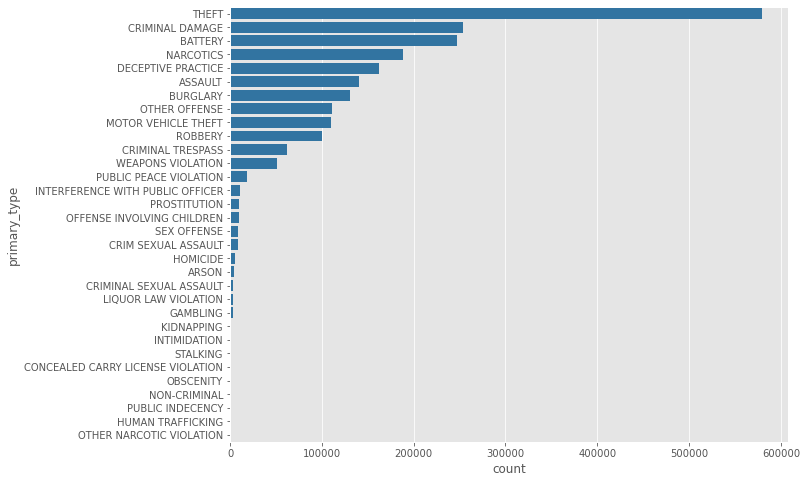

In [194]:
plt.figure(figsize = (10,8))
sns.countplot(data = df1, y = 'primary_type', order = df1['primary_type'].value_counts().index, color = 'tab:blue')
plt.show()

In [195]:
#상위 5개 분석

df_theft = df1.loc[df1['primary_type'] == 'THEFT']
df_criminalDamage = df1.loc[df1['primary_type'] == 'CRIMINAL DAMAGE']
df_battery = df1.loc[df1['primary_type'] == 'BATTERY']
df_narcotics = df1.loc[df1['primary_type'] == 'NARCOTICS']
df_deceptivePractice = df1.loc[df1['primary_type'] == 'DECEPTIVE PRACTICE']

# theft
절도

In [196]:
df_theft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578859 entries, 1 to 2670245
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   unique_key            578859 non-null  int64              
 1   date                  578859 non-null  datetime64[ns, UTC]
 2   primary_type          578859 non-null  object             
 3   location_description  578859 non-null  object             
 4   arrest                578859 non-null  bool               
 5   domestic              578859 non-null  bool               
 6   beat                  578859 non-null  int64              
 7   community_area        578859 non-null  float64            
 8   month                 578859 non-null  object             
 9   year                  578859 non-null  object             
 10  only_month            578859 non-null  object             
dtypes: bool(2), datetime64[ns, UTC](1), float64(1), int

## 기간별 발생 수

In [197]:
df_theft['year'].value_counts()

2012    72924
2013    69447
2018    62975
2017    62091
2019    60109
2014    59566
2016    59367
2015    55283
2020    39068
2021    38029
Name: year, dtype: int64

In [391]:
df_theft['year'].value_counts().reset_index().sort_values(by = 'index')

,index,year
0,2012,72924
1,2013,69447
5,2014,59566
7,2015,55283
6,2016,59367
3,2017,62091
2,2018,62975
4,2019,60109
8,2020,39068
9,2021,38029


In [225]:
df_theft['year'].value_counts() / 72924 *100

2012    100.000000
2013     95.232022
2018     86.357029
2017     85.144808
2019     82.426910
2014     81.682299
2016     81.409413
2015     75.809061
2020     53.573583
2021     52.148812
Name: year, dtype: float64

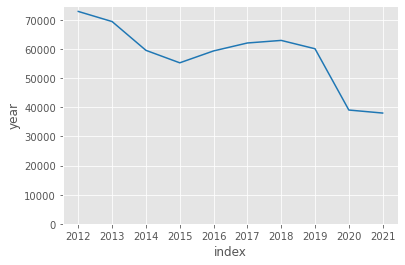

In [394]:
sns.lineplot(data = df_theft['year'].value_counts().reset_index().sort_values(by = 'index'), x = 'index', y = 'year', color = 'tab:blue')
plt.ylim(bottom = 0)
plt.show()

In [223]:
38029 / 72924

0.5214881246228951

- 우하향
- 2019~2020년 사이 급감
- 2021년 발생 건수는 2012년 발생 건수의 52%

## 가장 많이 일어난 장소(location_description)

In [199]:
df_theft['location_description'].value_counts().head(10)

STREET                            141460
RESIDENCE                          47228
APARTMENT                          35229
SMALL RETAIL STORE                 34589
DEPARTMENT STORE                   30804
OTHER                              28059
SIDEWALK                           22828
PARKING LOT/GARAGE(NON.RESID.)     22553
RESTAURANT                         21700
GROCERY FOOD STORE                 20064
Name: location_description, dtype: int64

## 가장 많이 일어난 구역 (community_area)

In [200]:
df_theft['community_area'].value_counts().head(10)

8.0     46393
32.0    41848
28.0    29622
24.0    26648
6.0     22269
25.0    21475
7.0     19020
22.0    16252
43.0    13066
44.0    12964
Name: community_area, dtype: int64

## 체포 여부 (arrest)

In [201]:
df_theft['arrest'].value_counts() / 579344

False    0.897750
True     0.101413
Name: arrest, dtype: float64

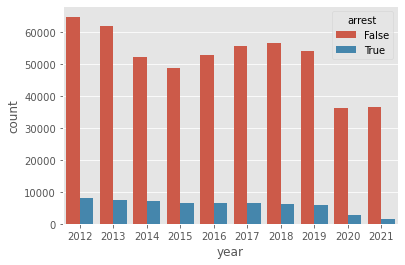

In [202]:
sns.countplot(data = df_theft, x = 'year', hue = 'arrest')
plt.show()

In [254]:
df_theft_arrest = pd.DataFrame(df_theft.groupby('year')['arrest'].value_counts())
df_theft_arrest.columns = ['count']
df_theft_arrest = df_theft_arrest.reset_index()
df_theft_arrest

,year,arrest,count
0,2012,False,64835
1,2012,True,8089
2,2013,False,61873
3,2013,True,7574
4,2014,False,52278
5,2014,True,7288
6,2015,False,48656
7,2015,True,6627
8,2016,False,52961
9,2016,True,6406


In [294]:
df_theft_arrest['year'] = df_theft_arrest['year'].astype('int32')
df_theft_arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    20 non-null     int32
 1   arrest  20 non-null     bool 
 2   count   20 non-null     int64
dtypes: bool(1), int32(1), int64(1)
memory usage: 388.0 bytes


In [238]:
print('2012년 체포율: ', round(8089 / df_theft.loc[df_theft['year'] == '2012', 'arrest'].count() * 100, 2), '%')

2012년 체포율:  11.09 %


In [374]:
def arrest_ratio(year, dataframe):
    i = 0
    while year < 2022:
        temp = dataframe.loc[dataframe['year'] == year]
        ratio = temp.loc[temp['arrest'] == True, 'count'] / temp['count'].sum() * 100
        ratio = ratio.values[0]
        #print(year, '년 체포율: ', round(ratio, 2), '%')
        theft_arrest_ratio.loc[i] = [year, round(ratio, 2)]
        i = i + 1
        year = year + 1

In [375]:
theft_arrest_ratio = pd.DataFrame(columns = ['year', 'ratio'])
theft_arrest_ratio

,year,ratio


In [376]:
arrest_ratio(2012, df_theft_arrest)
theft_arrest_ratio

,year,ratio
0,2012.0,11.09
1,2013.0,10.91
2,2014.0,12.24
3,2015.0,11.99
4,2016.0,10.79
5,2017.0,10.25
6,2018.0,9.88
7,2019.0,9.96
8,2020.0,6.98
9,2021.0,3.87


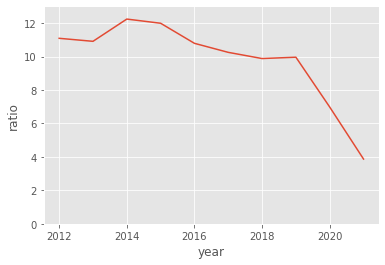

In [380]:
sns.lineplot(data = theft_arrest_ratio, x = 'year', y = 'ratio')
plt.ylim(0,13)
plt.show()

# CRIMINAL DAMAGE
손괴죄

## 기간별 발생 수

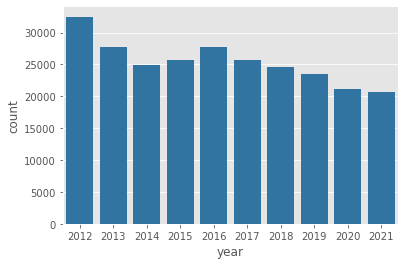

In [203]:
sns.countplot(data = df_criminalDamage, x = 'year', color = 'tab:blue')
plt.show()

## 가장 많이 일어난 장소(location_description)

In [204]:
df_criminalDamage['location_description'].value_counts().head(10)

STREET                            92272
RESIDENCE                         42690
APARTMENT                         29815
PARKING LOT/GARAGE(NON.RESID.)    10635
RESIDENCE-GARAGE                   9504
OTHER                              7278
RESIDENTIAL YARD (FRONT/BACK)      6255
VEHICLE NON-COMMERCIAL             4707
ALLEY                              4058
RESTAURANT                         3885
Name: location_description, dtype: int64

## 가장 많이 일어난 구역 (community_area)

In [205]:
df_criminalDamage['community_area'].value_counts().head(10)

25.0    12749
43.0     8834
24.0     8227
49.0     7375
28.0     7320
71.0     7053
29.0     6684
23.0     6591
67.0     6416
69.0     6224
Name: community_area, dtype: int64

## 체포 여부 (arrest)

In [206]:
df_criminalDamage['arrest'].value_counts().head(10)

False    240701
True      13405
Name: arrest, dtype: int64

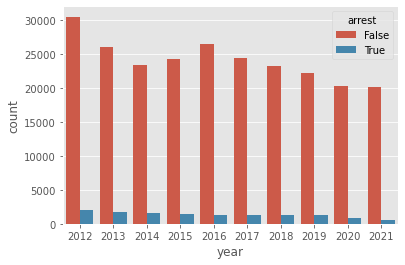

In [207]:
sns.countplot(data = df_criminalDamage, x = 'year', hue = 'arrest')
plt.show()

# BATTERY
폭행

## 기간별 발생 수

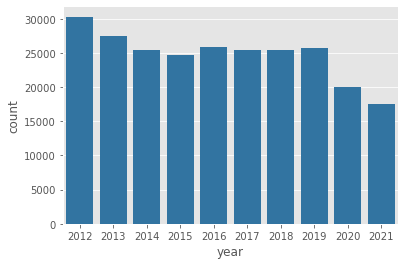

In [208]:
sns.countplot(data = df_battery, x = 'year', color = 'tab:blue')
plt.show()

## 가장 많이 일어난 장소(location_description)

In [209]:
df_battery['location_description'].value_counts().head(10)

SIDEWALK                    52453
STREET                      44292
APARTMENT                   26843
RESIDENCE                   21702
SCHOOL, PUBLIC, BUILDING    12086
ALLEY                        6986
OTHER                        6874
RESIDENCE PORCH/HALLWAY      5542
RESTAURANT                   5293
BAR OR TAVERN                4718
Name: location_description, dtype: int64

## 가장 많이 일어난 구역 (community_area)

In [210]:
df_battery['community_area'].value_counts().head(10)

25.0    15465
8.0      9848
29.0     8896
43.0     8346
23.0     7881
28.0     7618
67.0     7448
68.0     7092
69.0     6989
71.0     6933
Name: community_area, dtype: int64

## 체포 여부 (arrest)

In [211]:
df_battery['arrest'].value_counts().head(10)

False    194816
True      52765
Name: arrest, dtype: int64

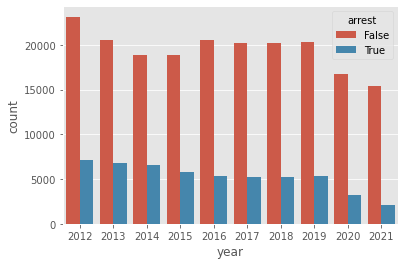

In [212]:
sns.countplot(data = df_battery, x = 'year', hue = 'arrest')
plt.show()

# NARCOTICS
마약 범죄

## 기간별 발생 수

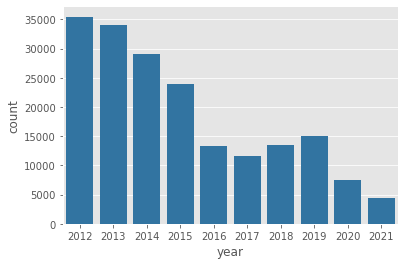

In [213]:
sns.countplot(data = df_narcotics, x = 'year', color = 'tab:blue')
plt.show()

## 가장 많이 일어난 장소(location_description)

In [214]:
df_narcotics['location_description'].value_counts().head(10)

SIDEWALK                           61003
STREET                             55481
ALLEY                              12703
VEHICLE NON-COMMERCIAL              8810
RESIDENCE                           7207
APARTMENT                           6003
PARKING LOT/GARAGE(NON.RESID.)      5257
RESIDENTIAL YARD (FRONT/BACK)       2920
POLICE FACILITY/VEH PARKING LOT     2686
PARK PROPERTY                       2506
Name: location_description, dtype: int64

## 가장 많이 일어난 구역 (community_area)

In [215]:
df_narcotics['community_area'].value_counts().head(10)

25.0    23846
29.0    17375
23.0    17277
26.0    15016
27.0     9618
67.0     6961
68.0     5536
71.0     5486
43.0     5070
49.0     4960
Name: community_area, dtype: int64

## 체포 여부 (arrest)

In [216]:
df_narcotics['arrest'].value_counts().head(10)

True     187275
False       851
Name: arrest, dtype: int64

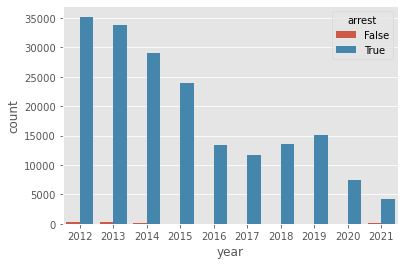

In [217]:
sns.countplot(data = df_narcotics, x = 'year', hue = 'arrest')
plt.show()

# DECEPTIVE PRACTICE
부정경쟁, 기만적 거래

## 기간별 발생 수

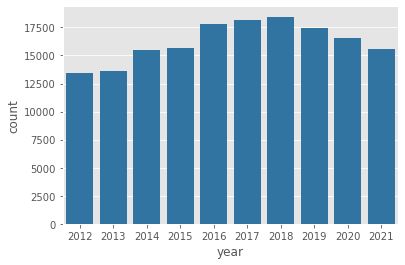

In [218]:
sns.countplot(data = df_deceptivePractice, x = 'year', color = 'tab:blue')
plt.show()

## 가장 많이 일어난 장소(location_description)

In [219]:
df_deceptivePractice['location_description'].value_counts().head(10)

RESIDENCE                         56340
APARTMENT                         21022
OTHER                             15437
STREET                             7934
BANK                               6465
RESTAURANT                         6310
SMALL RETAIL STORE                 4656
DEPARTMENT STORE                   4081
ATM (AUTOMATIC TELLER MACHINE)     3576
CTA PLATFORM                       3347
Name: location_description, dtype: int64

## 가장 많이 일어난 구역 (community_area)

In [220]:
df_deceptivePractice['community_area'].value_counts().head(10)

8.0     13460
32.0    11280
25.0     6882
28.0     6455
6.0      5932
24.0     4448
43.0     3955
7.0      3836
44.0     3569
71.0     3493
Name: community_area, dtype: int64

## 체포 여부 (arrest)

In [221]:
df_deceptivePractice['arrest'].value_counts().head(10)

False    149982
True      12264
Name: arrest, dtype: int64

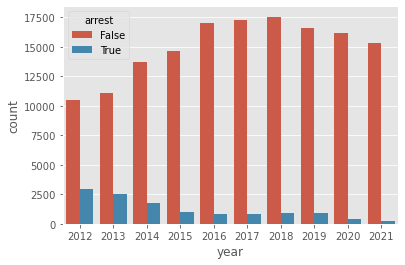

In [222]:
sns.countplot(data = df_deceptivePractice, x = 'year', hue = 'arrest')
plt.show()